<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
df = pd.read_csv("/content/DMV_Written_Tests.csv")
df.head()


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None
       DMV_Test_1  DMV_Test_2     Results
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


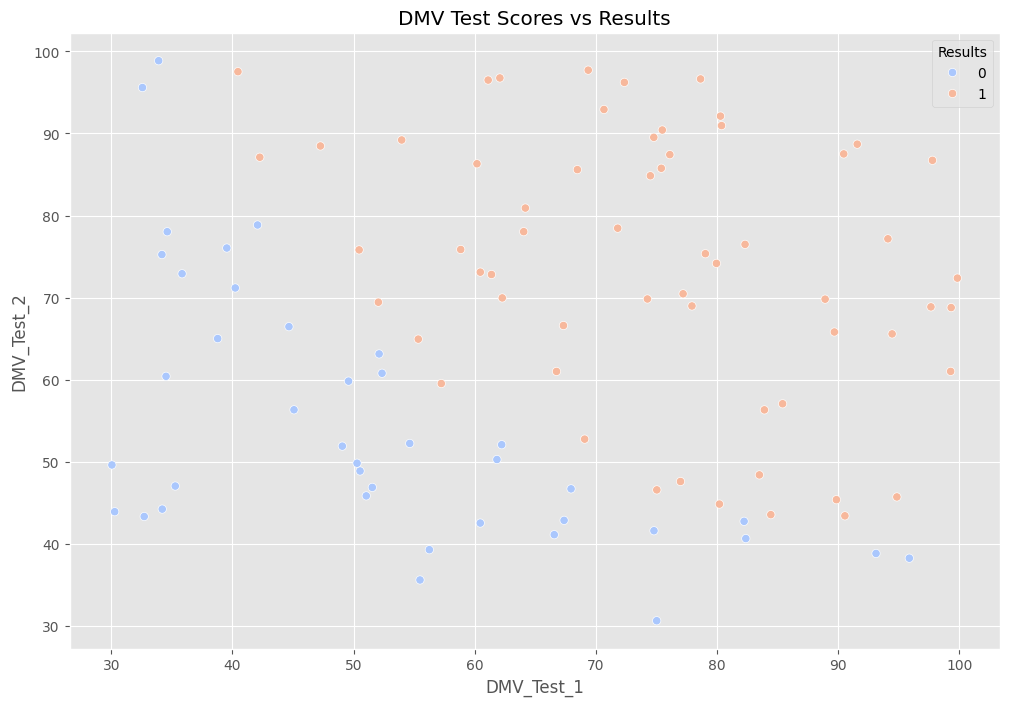

In [6]:
print(df.info())
print(df.describe())

sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", hue="Results", data=df, palette="coolwarm")
plt.title("DMV Test Scores vs Results")
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

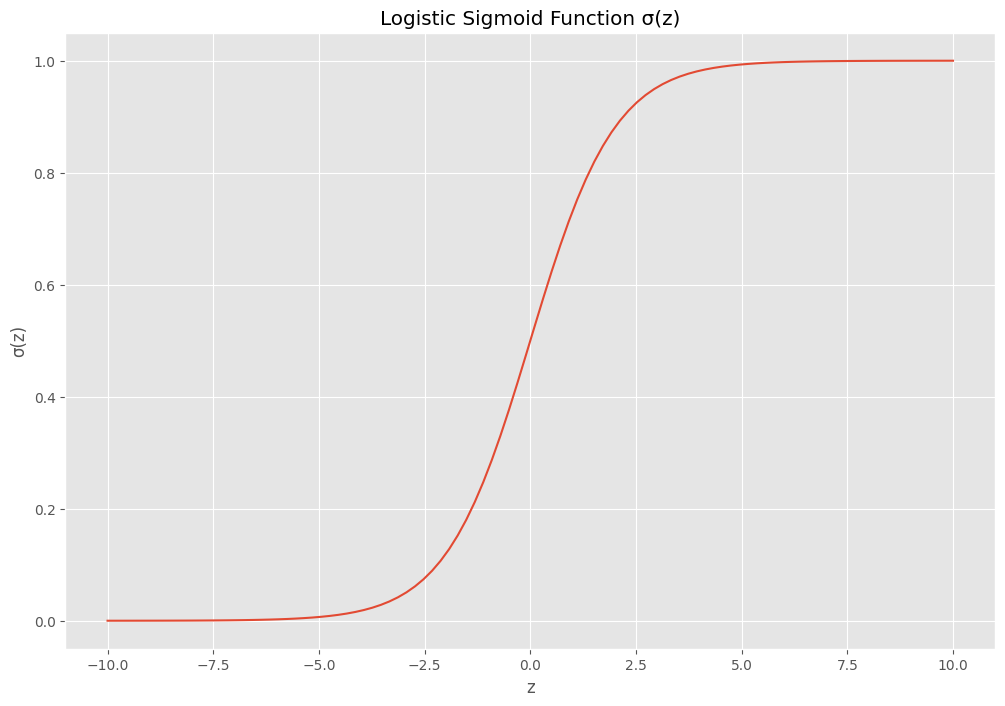

In [7]:
# Logistic (Sigmoid) Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example: test the function with a range of values
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Logistic Sigmoid Function σ(z)")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.grid(True)
plt.show()


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [8]:
# Hypothesis function using sigmoid
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# Cost function J(θ)
def compute_cost(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    epsilon = 1e-5  # to avoid log(0)
    cost = -(1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1-y), np.log(1 - h + epsilon)))
    return cost

# Gradient of the cost function
def compute_gradient(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient

# Example: Initialize parameters and compute initial cost & gradient
X = df[["DMV_Test_1", "DMV_Test_2"]].values
y = df["Results"].values

# Add intercept term (bias) to X
X = np.c_[np.ones((X.shape[0], 1)), X]

theta = np.zeros(X.shape[1])  # initialize parameters to zero

initial_cost = compute_cost(X, y, theta)
initial_gradient = compute_gradient(X, y, theta)

print("Initial Cost J(θ):", initial_cost)
print("Initial Gradient ∇J(θ):", initial_gradient)


Initial Cost J(θ): 0.6931271807599428
Initial Gradient ∇J(θ): [ -0.1        -12.00921659 -11.26284221]


### Task 6: Cost and Gradient at Initialization
---

In [10]:
import numpy as np
import pandas as pd

# Ensure df is loaded (it was loaded earlier in this session)
df = pd.read_csv("/content/DMV_Written_Tests.csv")

# ----- Task 6: Cost and Gradient at Initialization -----

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hypothesis
def hypothesis(X, theta):
    return sigmoid(np.dot(X, theta))

# Cost function J(theta)
def compute_cost(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    epsilon = 1e-9  # numerical stability
    cost = -(1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1-y), np.log(1 - h + epsilon)))
    return cost

# Gradient of J(theta)
def compute_gradient(X, y, theta):
    m = len(y)
    h = hypothesis(X, theta)
    grad = (1/m) * np.dot(X.T, (h - y))
    return grad

# Prepare design matrix X (with intercept) and label vector y
X = df[["DMV_Test_1", "DMV_Test_2"]].values
y = df["Results"].values

# Add intercept term
X = np.c_[np.ones((X.shape[0], 1)), X]  # shape: (m, 3)

# Initialize theta to zeros
theta_init = np.zeros(X.shape[1])

# Compute initial cost and gradient
initial_cost = compute_cost(X, y, theta_init)
initial_gradient = compute_gradient(X, y, theta_init)

print("Task 6: Cost and Gradient at Initialization")
print("------------------------------------------")
print(f"m (samples): {X.shape[0]}")
print(f"n (features incl. intercept): {X.shape[1]}")
print(f"Initial theta (zeros): {theta_init}")
print(f"\nInitial Cost J(theta): {initial_cost:.6f}")
print(f"Initial Gradient ∇J(theta):\n{initial_gradient}")




Task 6: Cost and Gradient at Initialization
------------------------------------------
m (samples): 100
n (features incl. intercept): 3
Initial theta (zeros): [0. 0. 0.]

Initial Cost J(theta): 0.693147
Initial Gradient ∇J(theta):
[ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

In [12]:
# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Compute gradient
        gradient = compute_gradient(X, y, theta)

        # Update theta
        theta = theta - alpha * gradient

        # Compute cost and store it
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        # Optional: print cost every 100 iterations
        if (i + 1) % 100 == 0:
            print(f"Iteration {i+1}: Cost = {cost:.6f}")

    return theta, cost_history

# Set hyperparameters
alpha = 0.01  # learning rate
num_iterations = 1000

# Initialize theta (re-initialize to zeros for a fresh start)
theta_optimized = np.zeros(X.shape[1])

# Run gradient descent
theta_optimized, cost_history = gradient_descent(X, y, theta_optimized, alpha, num_iterations)

print("\nOptimized theta:", theta_optimized)
print("Final cost J(theta):", cost_history[-1])

Iteration 100: Cost = 4.981319
Iteration 200: Cost = 7.712166
Iteration 300: Cost = 8.280133
Iteration 400: Cost = 4.524192
Iteration 500: Cost = 7.692183
Iteration 600: Cost = 8.279381
Iteration 700: Cost = 4.509513
Iteration 800: Cost = 7.672094
Iteration 900: Cost = 8.278577
Iteration 1000: Cost = 4.494844

Optimized theta: [-0.76754116  0.35868899 -0.11012487]
Final cost J(theta): 4.494843585970037


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

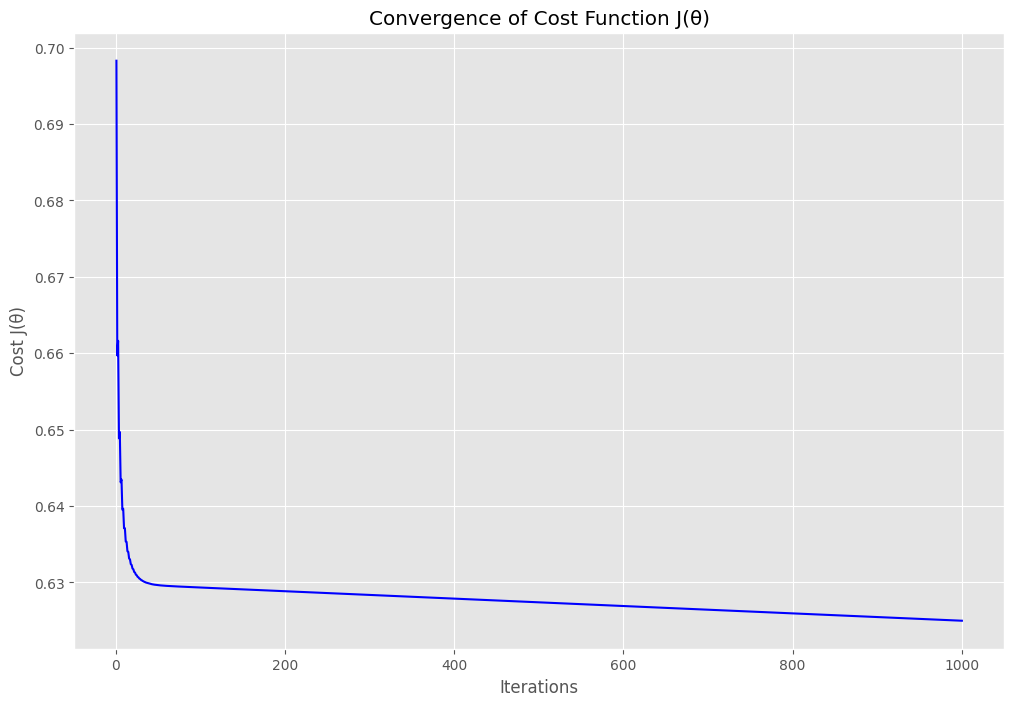

Final theta: [-0.06946097  0.01090733  0.00099135]
Final cost: 0.6249857569358721


In [13]:
# Gradient Descent Implementation
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        grad = compute_gradient(X, y, theta)
        theta = theta - alpha * grad
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

# Parameters
alpha = 0.001   # learning rate
iterations = 1000
theta_init = np.zeros(X.shape[1])

# Run Gradient Descent
theta_final, cost_history = gradient_descent(X, y, theta_init, alpha, iterations)

# Plot cost function convergence
plt.plot(range(1, iterations+1), cost_history, color='blue')
plt.title("Convergence of Cost Function J(θ)")
plt.xlabel("Iterations")
plt.ylabel("Cost J(θ)")
plt.grid(True)
plt.show()

print("Final theta:", theta_final)
print("Final cost:", cost_history[-1])


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

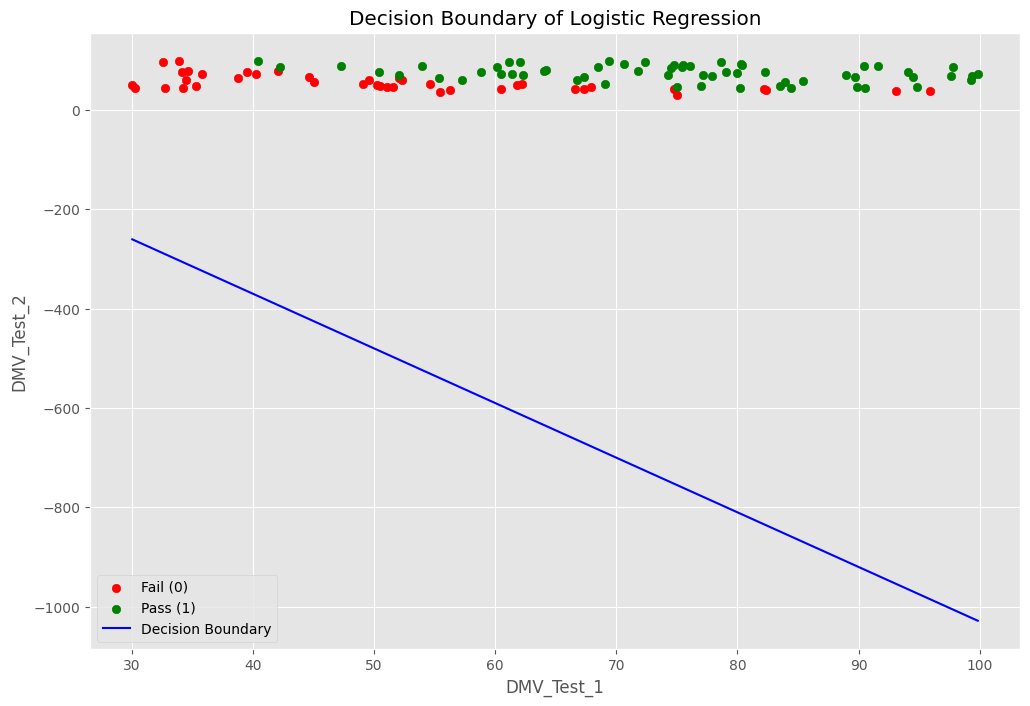

In [14]:
# Plotting the decision boundary
def plot_decision_boundary(X, y, theta):
    # Scatter plot of dataset
    plt.scatter(X[y==0][:,1], X[y==0][:,2], color="red", label="Fail (0)")
    plt.scatter(X[y==1][:,1], X[y==1][:,2], color="green", label="Pass (1)")

    # Equation: x3 = -(theta1 + theta2*x2)/theta3
    x_values = np.linspace(X[:,1].min(), X[:,1].max(), 100)
    y_values = -(theta[0] + theta[1]*x_values) / theta[2]

    plt.plot(x_values, y_values, label="Decision Boundary", color="blue")

    plt.xlabel("DMV_Test_1")
    plt.ylabel("DMV_Test_2")
    plt.title("Decision Boundary of Logistic Regression")
    plt.legend()
    plt.show()

# Call the function with final theta from gradient descent
plot_decision_boundary(X, y, theta_final)


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [15]:
# Prediction function using learned theta
def predict(X, theta):
    probs = hypothesis(X, theta)
    return (probs >= 0.5).astype(int)

# Predictions on training set
y_pred = predict(X, theta_final)

# Accuracy
accuracy = np.mean(y_pred == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

# Show first 10 predictions vs actual labels
print("\nFirst 10 predictions vs actual:")
for i in range(10):
    print(f"Pred: {y_pred[i]}  |  Actual: {y[i]}")


Training Accuracy: 60.00%

First 10 predictions vs actual:
Pred: 1  |  Actual: 0
Pred: 1  |  Actual: 0
Pred: 1  |  Actual: 0
Pred: 1  |  Actual: 1
Pred: 1  |  Actual: 1
Pred: 1  |  Actual: 0
Pred: 1  |  Actual: 1
Pred: 1  |  Actual: 1
Pred: 1  |  Actual: 1
Pred: 1  |  Actual: 1
